In [3]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
import sqlite3


conn = sqlite3.connect('..\db.sqlite3')
query = '''
SELECT 
    restaurant_order.id AS order_id,
    restaurant_order.datetime,
    restaurant_orderitem.quantity,
    restaurant_product.id AS product_id,
    restaurant_product.name AS product_name,
    restaurant_product.price
FROM 
    restaurant_order
JOIN 
    restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
'''

data = pd.read_sql_query(query, conn)
conn.close()

data.to_csv('combined_data.csv', index=False)
df = pd.read_csv('combined_data.csv')
df.shape[0]

74818

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

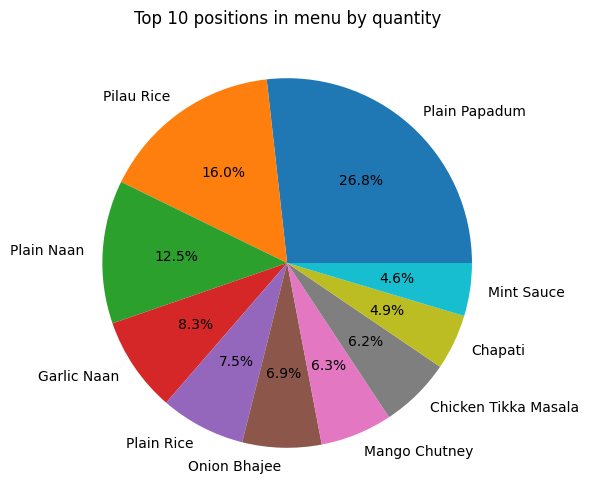

In [7]:
from matplotlib import pyplot as plt


conn = sqlite3.connect('..\db.sqlite3')
query = '''
SELECT 
    restaurant_product.name AS product_name,
    SUM(restaurant_orderitem.quantity) AS total_quantity
FROM 
    restaurant_orderitem
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
GROUP BY 
    restaurant_product.name
ORDER BY 
    total_quantity DESC
LIMIT 10
'''

top_products_df = pd.read_sql_query(query, conn)
conn.close()

plt.figure(figsize=(10, 6))
plt.pie(
    top_products_df['total_quantity'], 
    labels=top_products_df['product_name'], 
    autopct='%1.1f%%', 
)
plt.title('Top 10 positions in menu by quantity')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

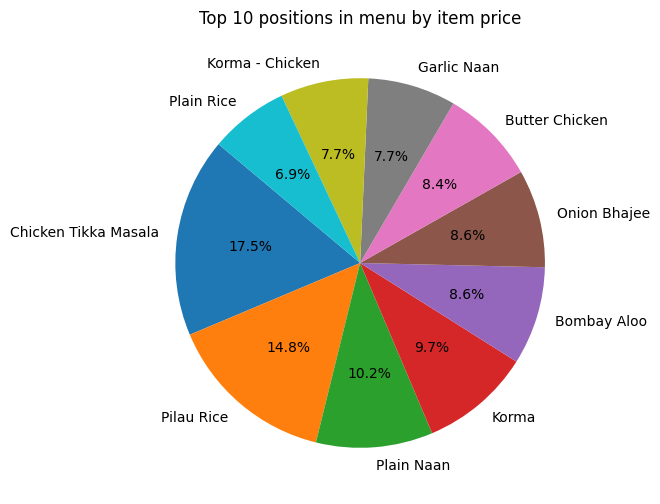

In [17]:
conn = sqlite3.connect('..\db.sqlite3')
query = '''
SELECT 
    restaurant_orderitem.quantity,
    restaurant_product.name AS product_name,
    restaurant_product.price AS product_price
FROM 
    restaurant_orderitem
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
'''

df = pd.read_sql_query(query, conn)
conn.close()
df['item_price'] = df['product_price'] * df['quantity']
top_products_by_revenue = df.groupby('product_name')['item_price'].sum().sort_values(ascending=False).head(10)
top_products_by_revenue_df = top_products_by_revenue.reset_index()

plt.figure(figsize=(10, 6))
plt.pie(
    top_products_by_revenue_df['item_price'], 
    labels=top_products_by_revenue_df['product_name'], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Top 10 positions in menu by item price')
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

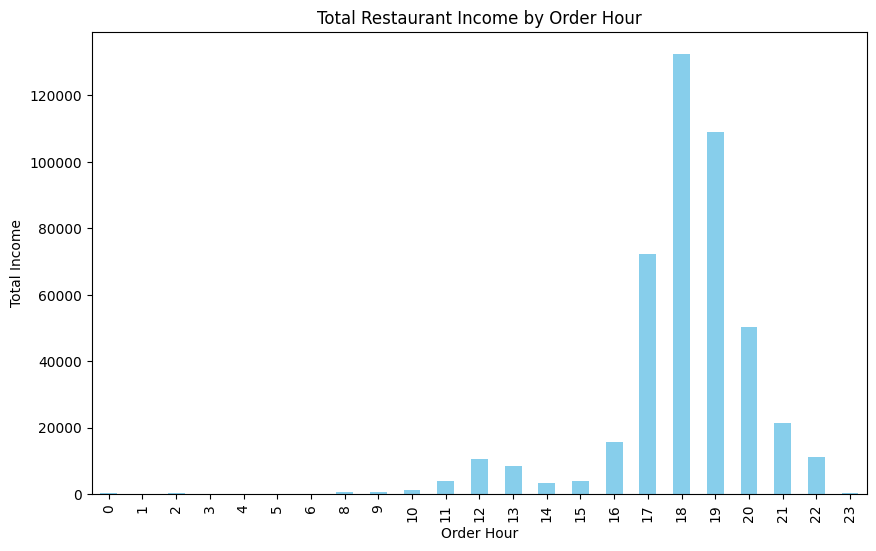

In [26]:
conn = sqlite3.connect('..\db.sqlite3')
query = '''
SELECT 
    restaurant_order.id AS order_id,
    restaurant_order.datetime AS order_datetime,
    restaurant_orderitem.quantity,
    restaurant_product.price AS product_price
FROM 
    restaurant_order
JOIN 
    restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
'''

df = pd.read_sql_query(query, conn)
conn.close()

df['order_datetime'] = pd.to_datetime(df['order_datetime'])
df['order_hour'] = df['order_datetime'].dt.hour
df['item_price'] = df['product_price'] * df['quantity']
income_by_hour = df.groupby('order_hour')['item_price'].sum()

plt.figure(figsize=(10, 6))
income_by_hour.plot(kind='bar', color='skyblue')
plt.title('Total Restaurant Income by Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Total Income')
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

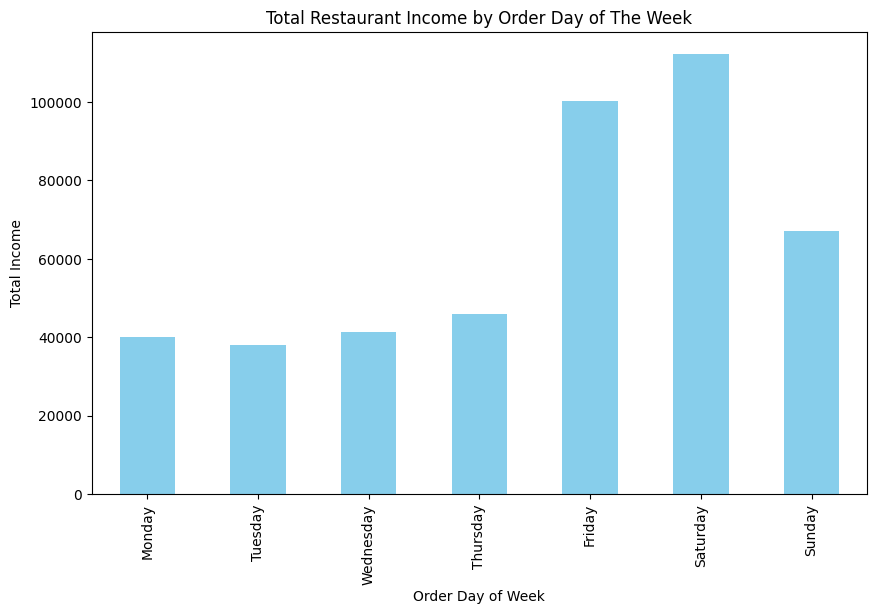

In [33]:
conn = sqlite3.connect('..\db.sqlite3')
query = '''
SELECT 
    restaurant_order.id AS order_id,
    restaurant_order.datetime AS order_datetime,
    restaurant_orderitem.quantity,
    restaurant_product.price AS product_price
FROM 
    restaurant_order
JOIN 
    restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
'''

df = pd.read_sql_query(query, conn)
conn.close()

df['order_day_of_week'] = pd.to_datetime(df['order_datetime'])
df['order_day_of_week'] = df['order_day_of_week'].dt.day_name()
df['item_price'] = df['product_price'] * df['quantity']
income_by_day = df.groupby('order_day_of_week')['item_price'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
income_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Restaurant Income by Order Day of The Week')
plt.xlabel('Order Day of Week')
plt.ylabel('Total Income')
plt.show()